In [1]:
%load_ext autoreload
%autoreload 2

I am checking the rates of NuE, NuMu, NuTau for the different datasets. I trained on 22612-22645 which is the baseline. I check the rates based on that same dataset, on a different independent (extra) dataset, and on the combined set.

Tracks:
- Very similar rates for baseline, extra, combined. Also flavor wise.

Cascades
- Same.

Doubles
- Very similar rates for components. Flavorwise, evaluating the extra set we get 0.08 more NuMu (+20%) and 0.15 less NuTau (-4%). This is averaged out when combining the sets. It doesnt seem to significant.

In [6]:
import sys, os
sys.path.append("/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks")
from plot_utils import *

In [3]:
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig


In [7]:
plotting_path = f"/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks/flavor_globalfit/combine_baseline_hese/"
os.system(f"mkdir -p {plotting_path}")

0

In [5]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_HESEBestfit.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=["override/systematics/NoSystematics.cfg", "override/datasets_hese/mcd-simpletopology_flux-hese_feat-11features_plus_rloglmilli_econf_evtgen/bdt1_0.333333_bdt2_0.366667_length_10.cfg", "override/binning/hese/10bdtprod_threshold_0.122.cfg"],
        override_components_files=None,
        override_parameters_files=None)
hist_graph_hdl = HistogramGraph(config_hdl)
detector_configs = config_hdl.get_det_configs()

IC86_pass2_SnowStorm_FTP_HESE_Cascades


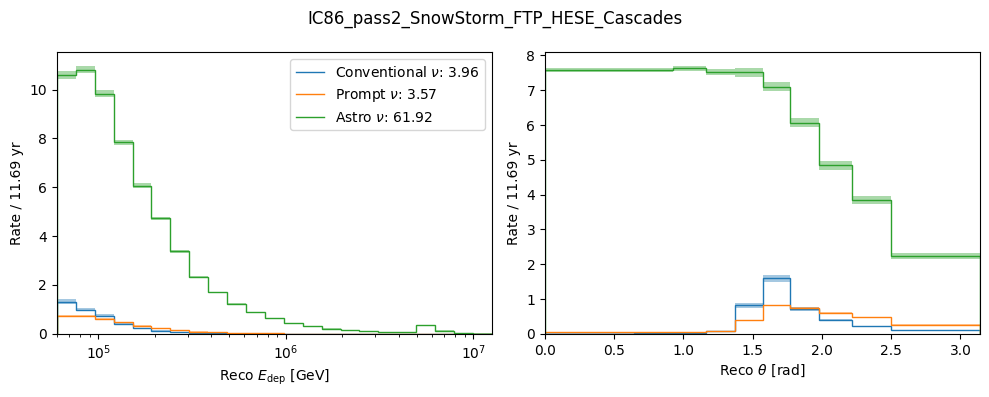

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


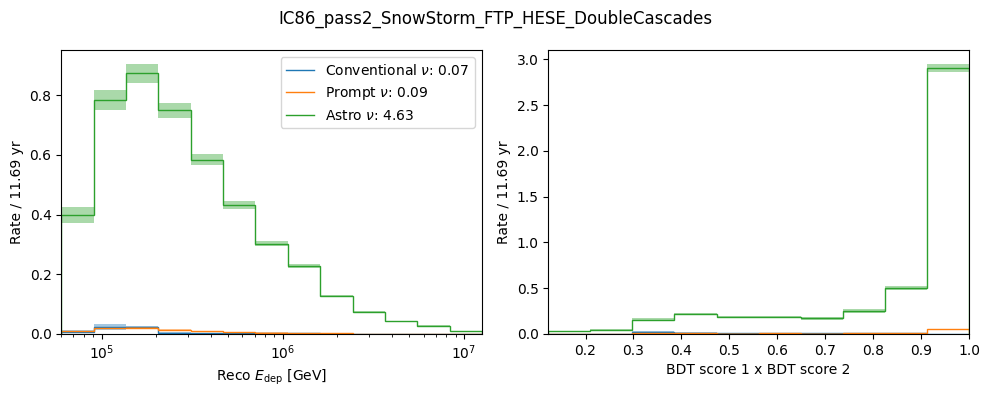

IC86_pass2_SnowStorm_FTP_HESE_Tracks


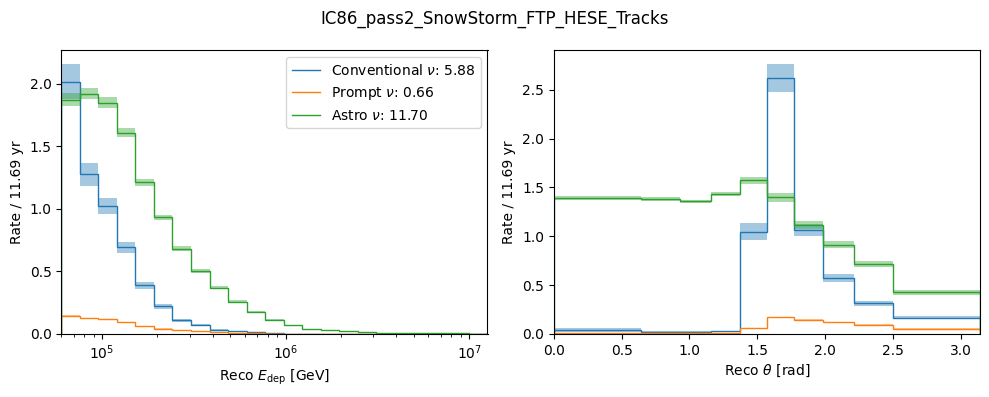

In [8]:
plotting_path_histogram = f"{plotting_path}/baseline"
os.system(f"mkdir -p {plotting_path_histogram}")
input_variables = {
    r"Conventional $\nu$" : {"astro_norm" : 0, "prompt_norm" : 0, "conv_norm" : 1},
    r"Prompt $\nu$" : {"astro_norm" : 0, "prompt_norm" : 1, "conv_norm" : 0},
    r"Astro $\nu$" : {"astro_norm" : 2.1233, "prompt_norm" : 0, "conv_norm" : 0},
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl, det_config=det_config, input_variables = input_variables, ylog=None, 
                   savepath=f"{plotting_path_histogram}/{det_config}_ylog-None.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


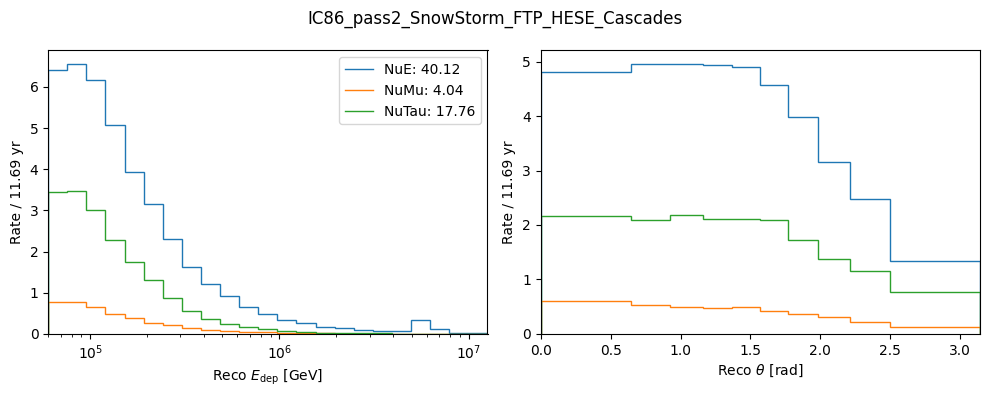

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


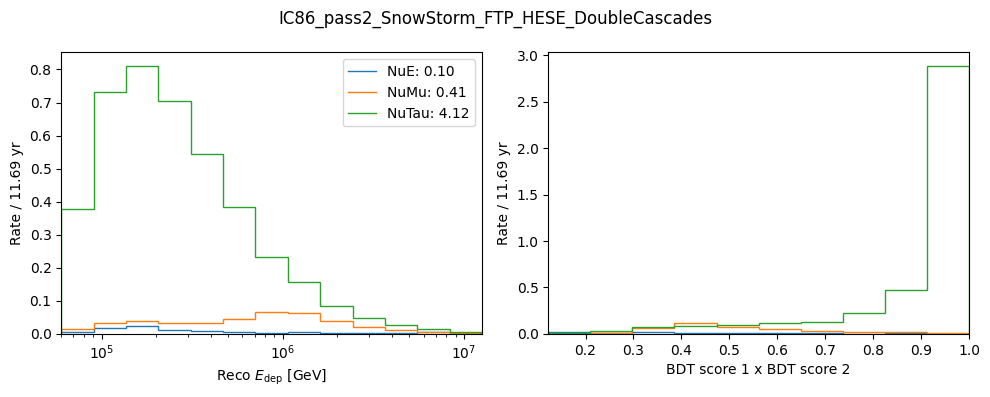

IC86_pass2_SnowStorm_FTP_HESE_Tracks


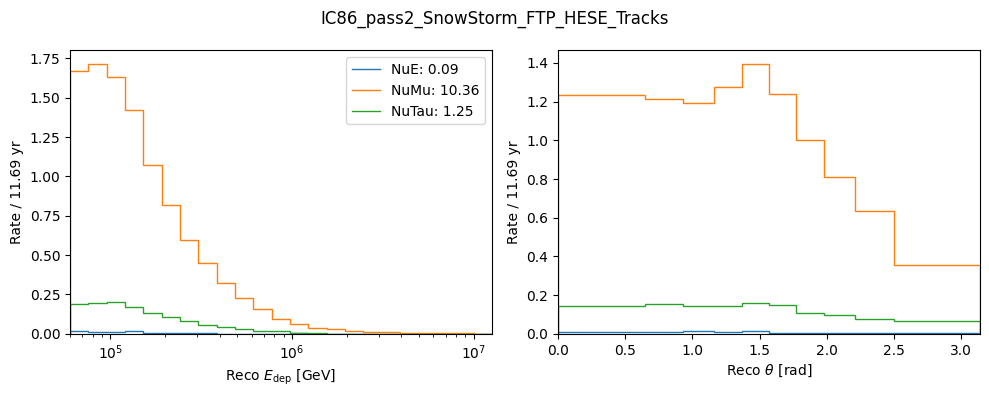

In [9]:
for det_config in detector_configs: 
    plot_histogram_astro_flavor(hist_graph_hdl=hist_graph_hdl, det_config=det_config, ylog=None, 
                                gamma_astro = 2.87, astro_norm = 2.1233,
                                savepath=f"{plotting_path_histogram}/flavor_astro_{det_config}_ylog-None.png")

Now lets the extra dataset, different set than training

In [10]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_HESEBestfit.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=["override/systematics/NoSystematics.cfg", "override/datasets_hese/mcd-simpletopology_flux-hese_feat-11features_plus_rloglmilli_econf_evtgen/bdt1_0.333333_bdt2_0.366667_length_10_extraBaseline.cfg", "override/binning/hese/10bdtprod_threshold_0.122.cfg"],
        override_components_files=None,
        override_parameters_files=None)
hist_graph_hdl = HistogramGraph(config_hdl)
detector_configs = config_hdl.get_det_configs()

IC86_pass2_SnowStorm_FTP_HESE_Cascades


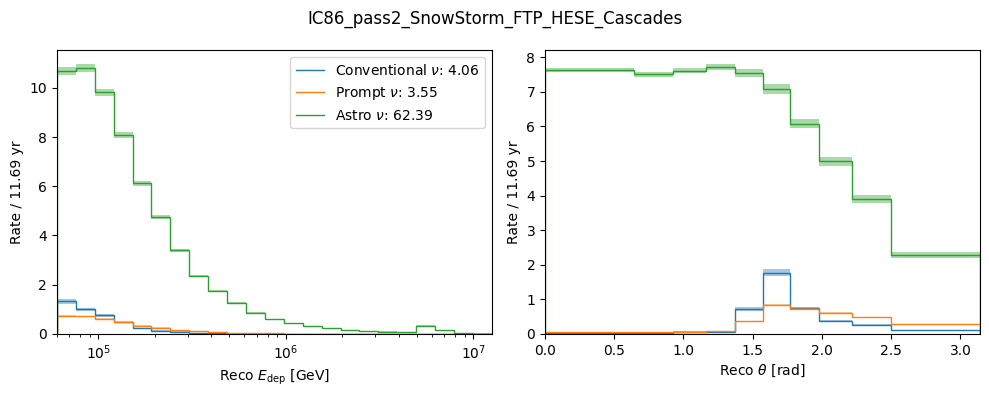

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


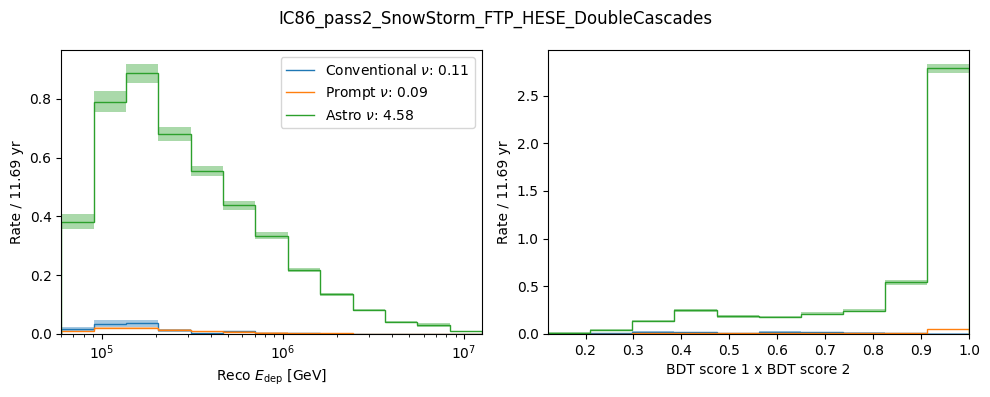

IC86_pass2_SnowStorm_FTP_HESE_Tracks


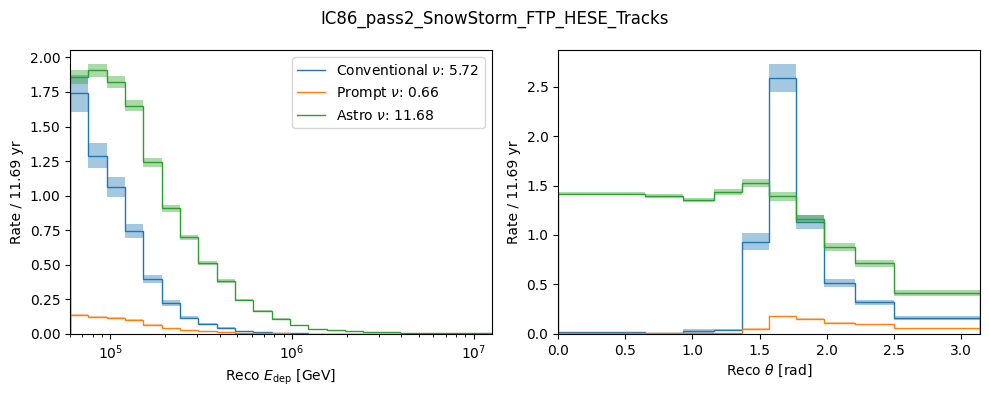

In [11]:
plotting_path_histogram = f"{plotting_path}/extra"
os.system(f"mkdir -p {plotting_path_histogram}")
input_variables = {
    r"Conventional $\nu$" : {"astro_norm" : 0, "prompt_norm" : 0, "conv_norm" : 1},
    r"Prompt $\nu$" : {"astro_norm" : 0, "prompt_norm" : 1, "conv_norm" : 0},
    r"Astro $\nu$" : {"astro_norm" : 2.1233, "prompt_norm" : 0, "conv_norm" : 0},
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl, det_config=det_config, input_variables = input_variables, ylog=None, 
                   savepath=f"{plotting_path_histogram}/{det_config}_ylog-None.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


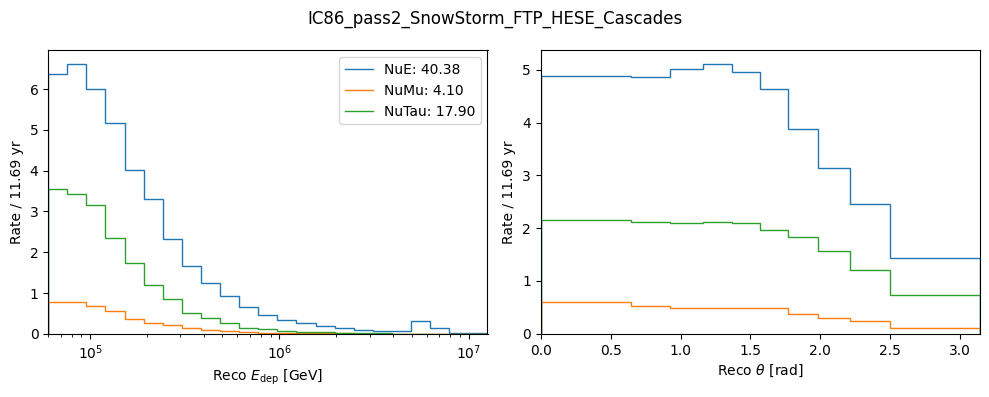

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


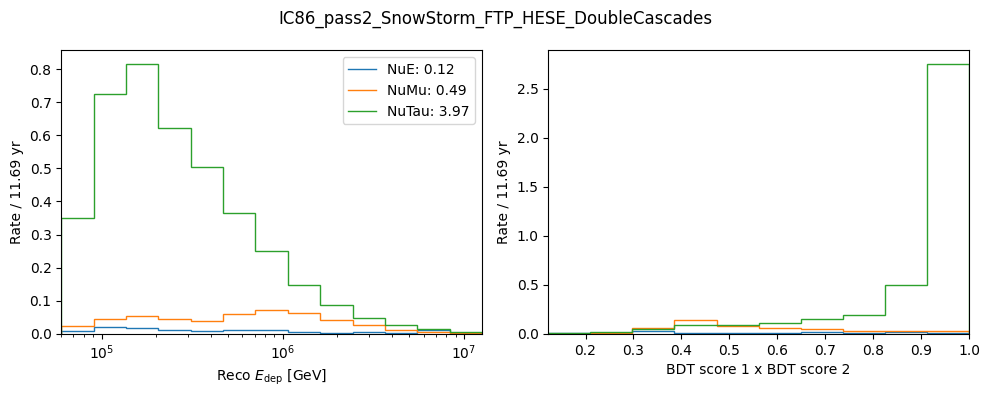

IC86_pass2_SnowStorm_FTP_HESE_Tracks


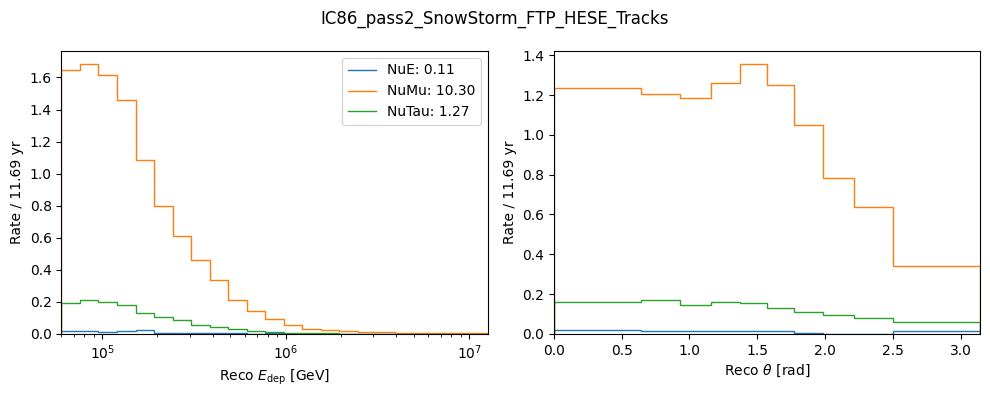

In [12]:
for det_config in detector_configs: 
    plot_histogram_astro_flavor(hist_graph_hdl=hist_graph_hdl, det_config=det_config, ylog=None, 
                                gamma_astro = 2.87, astro_norm = 2.1233,
                                savepath=f"{plotting_path_histogram}/flavor_astro_{det_config}_ylog-None.png")

Now lets do the combined 

In [13]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_HESEBestfit.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=["override/systematics/NoSystematics.cfg", "override/datasets_hese/mcd-simpletopology_flux-hese_feat-11features_plus_rloglmilli_econf_evtgen/bdt1_0.333333_bdt2_0.366667_length_10_combinedBaseline.cfg", "override/binning/hese/10bdtprod_threshold_0.122.cfg"],
        override_components_files=None,
        override_parameters_files=None)
hist_graph_hdl = HistogramGraph(config_hdl)
detector_configs = config_hdl.get_det_configs()

IC86_pass2_SnowStorm_FTP_HESE_Cascades


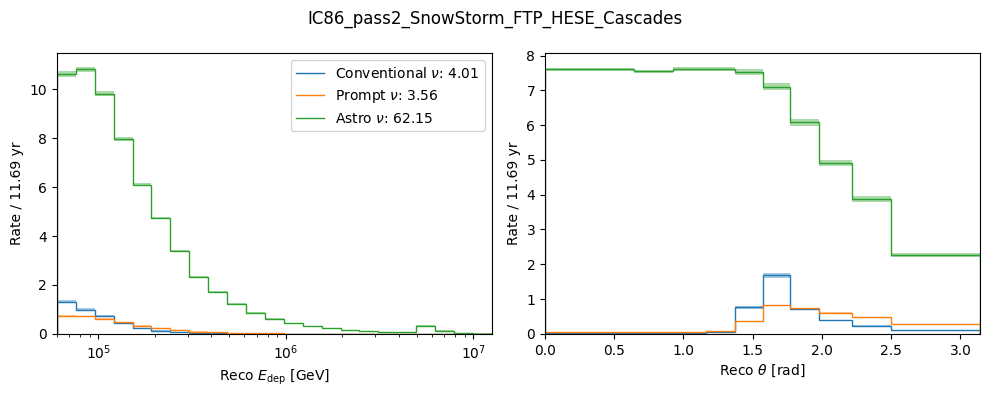

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


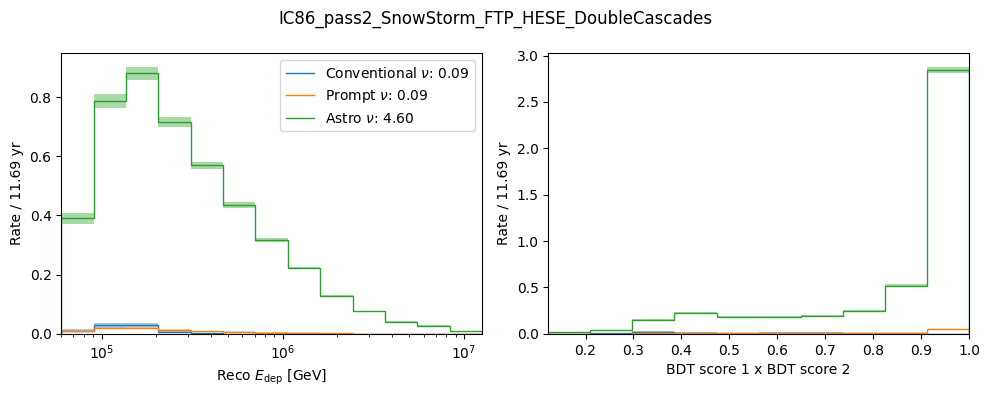

IC86_pass2_SnowStorm_FTP_HESE_Tracks


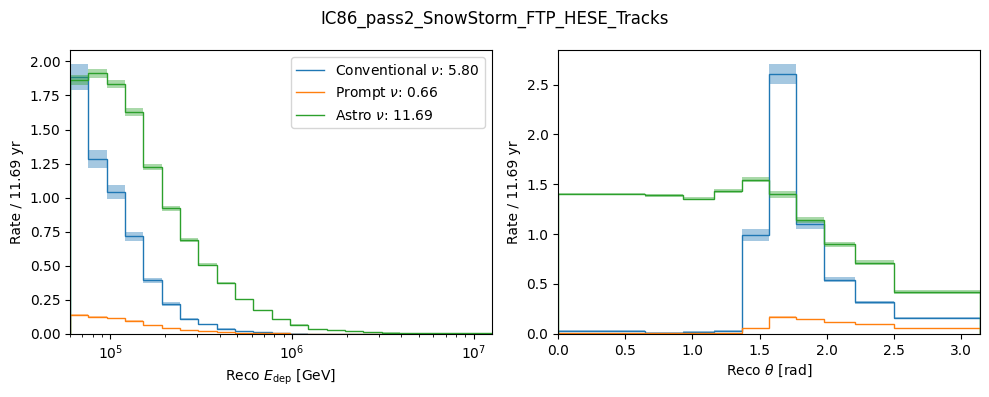

In [14]:
plotting_path_histogram = f"{plotting_path}/combined"
os.system(f"mkdir -p {plotting_path_histogram}")
input_variables = {
    r"Conventional $\nu$" : {"astro_norm" : 0, "prompt_norm" : 0, "conv_norm" : 1},
    r"Prompt $\nu$" : {"astro_norm" : 0, "prompt_norm" : 1, "conv_norm" : 0},
    r"Astro $\nu$" : {"astro_norm" : 2.1233, "prompt_norm" : 0, "conv_norm" : 0},
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl, det_config=det_config, input_variables = input_variables, ylog=None, 
                   savepath=f"{plotting_path_histogram}/{det_config}_ylog-None.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


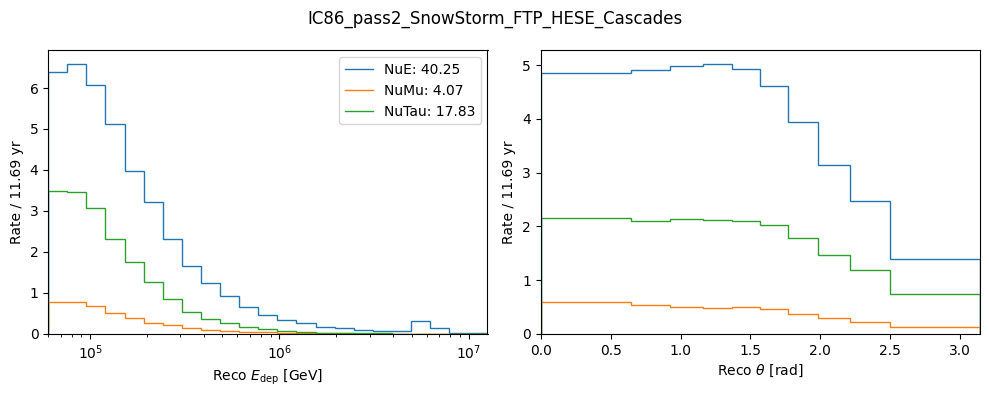

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


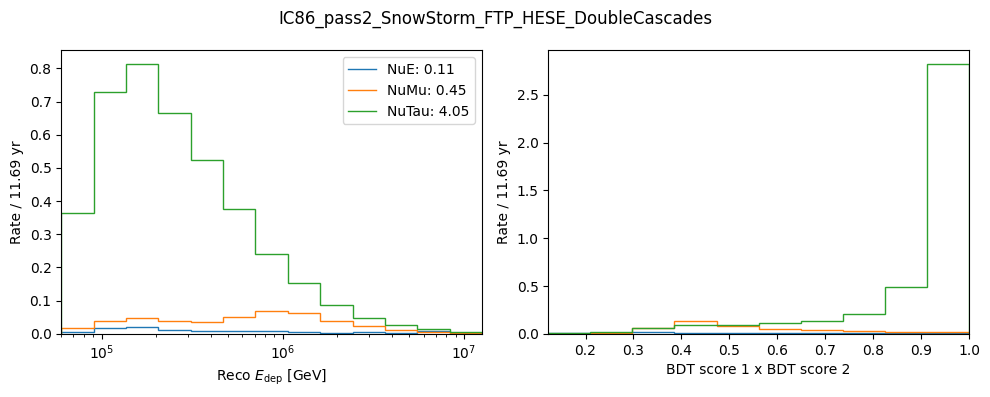

IC86_pass2_SnowStorm_FTP_HESE_Tracks


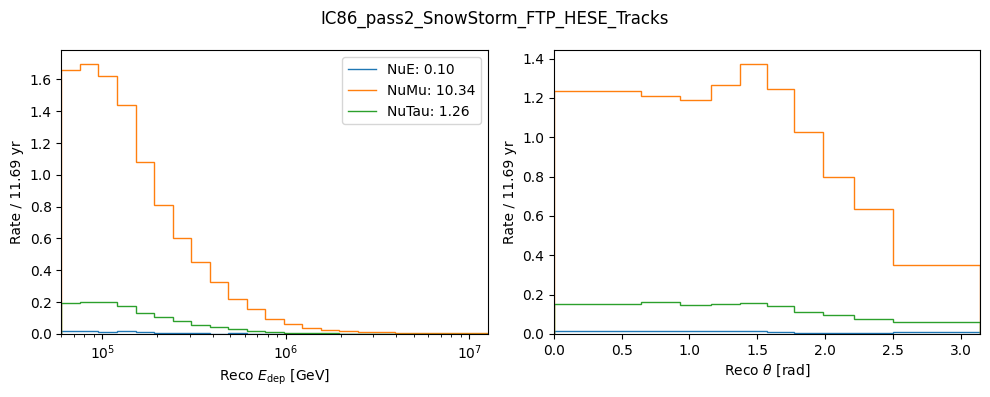

In [15]:
for det_config in detector_configs: 
    plot_histogram_astro_flavor(hist_graph_hdl=hist_graph_hdl, det_config=det_config, ylog=None, 
                                gamma_astro = 2.87, astro_norm = 2.1233,
                                savepath=f"{plotting_path_histogram}/flavor_astro_{det_config}_ylog-None.png")